In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
most_recent_date

('2017-08-23',)

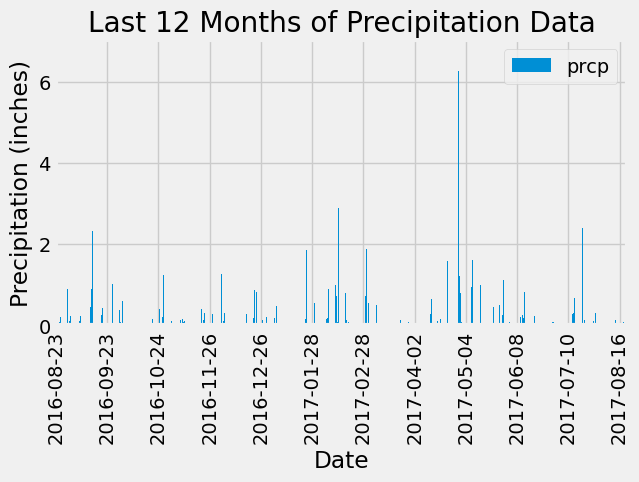

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago
# Perform a query to retrieve the data and precipitation scores
year_preciptiation = session.query(Measurements.date, Measurements.prcp).\
    filter(func.strftime(Measurements.date) >= year_ago).\
    order_by(Measurements.date).all()
year_preciptiation

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_preciptiation, columns=['date', 'prcp'])

# Sort the dataframe by date
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar()
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Last 12 Months of Precipitation Data')
plt.xticks(rotation=90)
n = 200
plt.xticks(range(0, len(df.index), n))
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(Stations).count()

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Station_count = session.query(Measurements.station, func.count(Measurements.station).label('Station Count')).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()
Station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

results = session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs).\
    filter(func.strftime(Measurements.date) >= year_ago)).filter(Measurements.station == 'USC00519281').all()
results


[(54.0, 85.0, 73.10795454545455)]

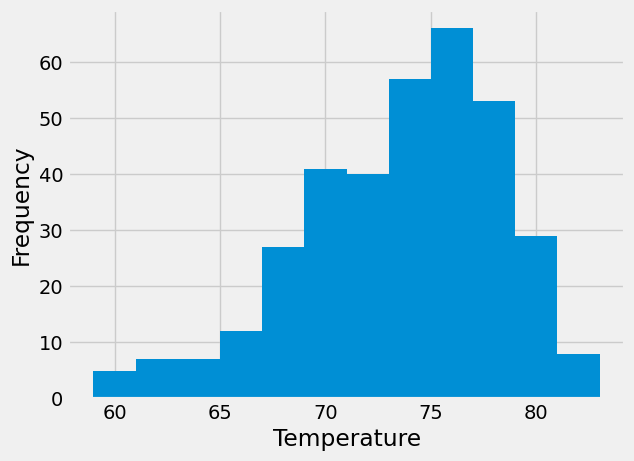

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs = session.query(Measurements.date, Measurements.tobs).\
    filter(func.strftime(Measurements.date) >= year_ago).filter(Measurements.station == 'USC00519281').all()
year_tobs

temp_vals = [temp[1] for temp in year_tobs]

plt.hist(temp_vals, bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

# Close Session

In [35]:
# Close Session
session.close()